# <font color="#8333ff">TP : Pratiquez la régression linéaire sur le jeu de données de l'ozone</font>

Mettons maintenant en œuvre la régression linéaire sur le pic d'ozone, expliqué par la température à midi. Voyons la phase d'estimation du modèle, puis mettons en œuvre une prévision.

## Importez les données

On commence par charger les librairies numpy, pandas et seaborn qui nous permettront de réaliser ce TP

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

On importe le fichier ozone, qui contient 112 données recueillies dans la ville de Rennes durant l'été 2001 avec le package pandas.

In [56]:

ozone = pd.read_csv("C:\\Users\\flori\\Downloads\\ozone.csv", delimiter=";", decimal=',')

On trouve dans ce fichier des variables telles que :
- MaxO3, qui est la valeur maximale d'ozone observée sur une journée ;
- T9, T12 et T15 qui sont les températures prises respectivement à 9 h, 12 h et 15 h ;
- Ne9, Ne12, Ne15 qui sont des nébulosités prises à 9 h, 12 h et 15 h ;
- Vx9, Vx12 et Vx15 qui sont les composantes est-ouest du vent mesurées à 9 h, 12 h et 15 h ;
- MaxO3V, qui donne la teneur maximale en ozone observée la veille ;
- vent, l'orientation du vent à 12 h ;
- pluie, la présence ou non de pluie.

## Visualisez le jeu de données

Visualisons une partie des données depuis le dataframe pandas.

In [57]:
ozone

,obs,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
0,601,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,Nord,Sec
1,602,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,Nord,Sec
2,603,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82,Est,Sec
3,604,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92,Nord,Sec
4,605,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114,Ouest,Sec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,925,84,13.3,17.7,17.8,3,5,6,0.0000,-1.0000,-1.2856,76,Sud,Sec
108,927,77,16.2,20.8,22.1,6,5,5,-0.6946,-2.0000,-1.3681,71,Sud,Pluie
109,928,99,16.9,23.0,22.6,6,4,7,1.5000,0.8682,0.8682,77,Sud,Sec
110,929,83,16.9,19.8,22.1,6,5,3,-4.0000,-3.7588,-4.0000,99,Ouest,Pluie


On peut représenter graphiquement le nuage de points maxO3 en fonction de T12:

Text(0, 0.5, 'maxO3 (Concentration max en ozone)')

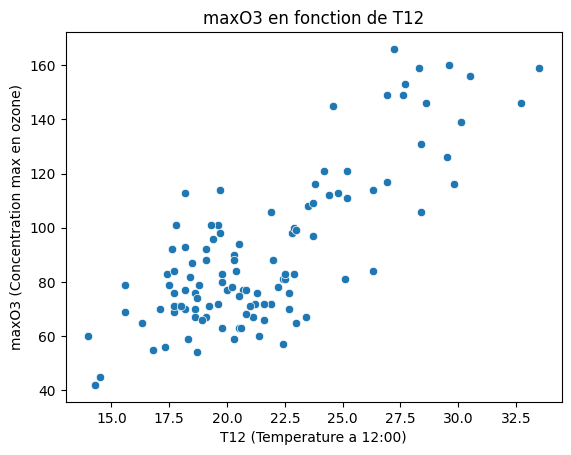

In [58]:

sns.scatterplot(x='T12', y='maxO3', data=ozone)
plt.title('maxO3 en fonction de T12')
plt.xlabel('T12 (Temperature a 12:00)')
plt.ylabel('maxO3 (Concentration max en ozone)')

*Ce nuage de points nous fait penser à un alignement selon une forme qui n'est pas très loin d'une droite.*

## Réalisez une régression linéaire simple

Essayons de lancer une régression linéaire simple sur ce nuage de points en utilisant le package statsmodels:

In [59]:
# MaxO3 = f(T12) avec le package statsmodels


# Dépendante : maxO3
Y = ozone['maxO3']
X = ozone['T12']

X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()


In [60]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  maxO3   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     175.8
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           1.51e-24
Time:                        12:25:26   Log-Likelihood:                -478.91
No. Observations:                 112   AIC:                             961.8
Df Residuals:                     110   BIC:                             967.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.4196      9.033     -3.035      0.003     -45.322      -9.517
T12            5.4687      0.412     13.258      0.000       4.651       6.286
==============================================================================
Omnibus:                        1.154   Durbin-Watson:                   1.101
Prob(Omnibus):                  0.562   Jarque-Bera (JB):                1.242
Skew:                           0.196   Prob(JB):                        0.537
Kurtosis:                       2.664   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Afficher les résultats de cette regression avec la commande summary() du package statsmodels

Nous obtenons avec la fonction summary() des statistiques sur les coefficients obtenus : leur valeur, leur écart-type, la statistique de test de Student, et la p-valeur (le test effectué sur le paramètre est ici le test de significativité : le paramètre vaut 0 versus le paramètre est différent de 0), ainsi que des statistiques sur le modèle général ($R^{2}$, $AIC$, etc...).

Merci d'interpreter ces données :

In [61]:
### CODE HERE ###

---------- Interpretation HERE -------------
Le R² est de 61,2 %, c'est-à-dire que l'on récupère 61,2 % d'infos en plus par rapport à la moyenne

## Visualisez la droite de régression

Alors, voyons à quoi ressemble notre droite ?

Text(0, 0.5, "maxO3 (Concentration maximale d'Ozone)")

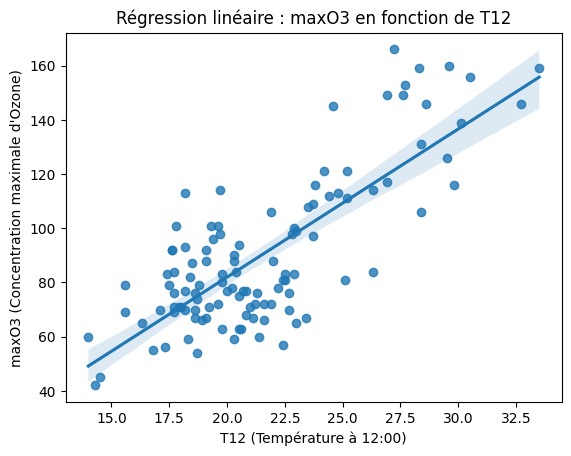

In [62]:
# Tracer la ligne de régression
sns.regplot(x='T12', y='maxO3', data=ozone)

plt.title('Régression linéaire : maxO3 en fonction de T12')
plt.xlabel('T12 (Température à 12:00)')
plt.ylabel('maxO3 (Concentration maximale d\'Ozone)')

On peut également représenter les valeurs ajustées en fonction des valeurs observées : (droite de regression + les données d'entrainement)

Text(0, 0.5, 'Valeurs ajustées (Prédictions)')

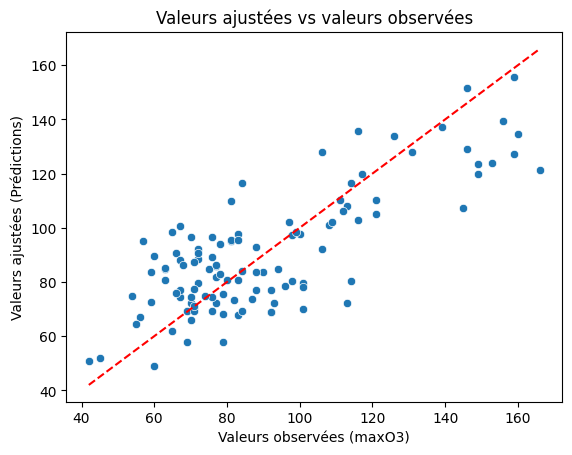

In [63]:
# Obtenir les valeurs ajustées (prédites)
ozone['fitted_values'] = results.fittedvalues

# Tracer les valeurs ajustées vs les valeurs observées
sns.scatterplot(x=ozone['maxO3'], y=ozone['fitted_values'])

# Tracer la droite y=x pour visualiser une "ligne parfaite"
plt.plot([ozone['maxO3'].min(), ozone['maxO3'].max()], 
         [ozone['maxO3'].min(), ozone['maxO3'].max()], 
         color='red', linestyle='--')

# Ajouter des titres et étiquettes
plt.title('Valeurs ajustées vs valeurs observées')
plt.xlabel('Valeurs observées (maxO3)')
plt.ylabel('Valeurs ajustées (Prédictions)')

La droite qui s'affiche est la première bissectrice. Si le modèle était parfait,
les valeurs réelles et les valeurs ajustées seraient égales, donc sur un tel graphique, les points seraient alignés sur la droite d'équation $y=x$, soit la première bissectrice.

## Représentez les résidus du modèle

On peut obtenir les résidus du modèle à l'aide de la commande 'resid' de l'objet statsmodels :

In [64]:
ozone['residus'] = results.resid
print(ozone[['maxO3','fitted_values','residus']])

     maxO3  fitted_values    residus
0       87      73.751034  13.248966
1       82      73.204166   8.795834
2       92      68.829218  23.170782
3      114      80.313456  33.686544
4       94      84.688404   9.311596
..     ...            ...        ...
107     84      69.376086  14.623914
108     77      86.329009  -9.329009
109     99      98.360116   0.639884
110     83      80.860325   2.139675
111     70      74.297903  -4.297903

[112 rows x 3 columns]


À partir du résultat précédent, on peut générer l'histogramme des résidus.

Text(0, 0.5, 'Frequence')

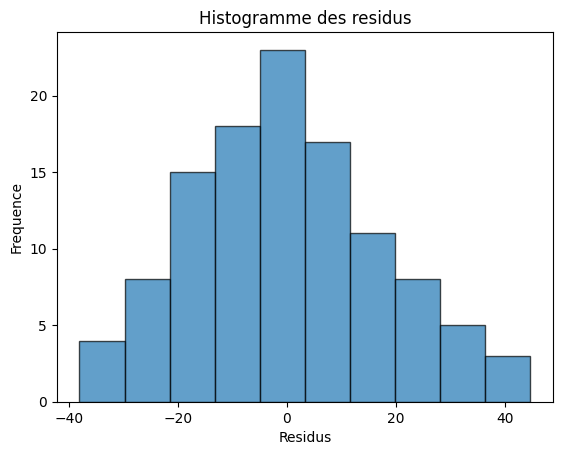

In [65]:
plt.hist(ozone['residus'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogramme des residus')
plt.xlabel('Residus')
plt.ylabel('Frequence')

Interpretation : On obtient une représentation quasi normale des résidus